In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import tensorflow as tf
#from tqdm import tqdm
import random as rn
from random import shuffle
from zipfile import ZipFile
from PIL import Image
from skimage.feature import hog
from skimage import feature, color, data
from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow

In [ ]:
trn_img_path = "/content/drive/MyDrive/Colab Notebooks/archive/train"
tst_img_path = "/content/drive/MyDrive/Colab Notebooks/archive/test"

X_train =[] # Stores the training image features
label_train = [] # Stores the training image labels
X_test = [] # Stores the testing image features
label_test = [] # Stores the testing image label

In [ ]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.regularizers import l2

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

batch_size = 32
img_height = 180
img_width = 180

train_ds = image_dataset_from_directory(trn_img_path,
                                        seed = 123,
                                        image_size=(img_height, img_width),
                                        validation_split=0.2,
                                        subset='training')

Found 2637 files belonging to 2 classes.
Using 2110 files for training.


In [ ]:
class_names = train_ds.class_names
print(type(class_names), class_names)

<class 'list'> ['benign', 'malignant']


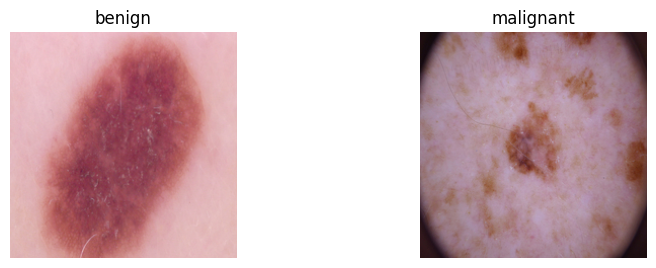

In [ ]:
plt.figure(figsize=(15, 10))

for i, class_ in enumerate(list(class_names)):
    plt.subplot(3, 3, i+1)
    data_path = os.path.join(str(trn_img_path), class_)
    file_path = glob.glob(os.path.join(data_path,'*.jpg'))[10]
    img = PIL.Image.open(file_path)
    plt.imshow(img)
    plt.title(class_)
    plt.axis("off")
plt.show()

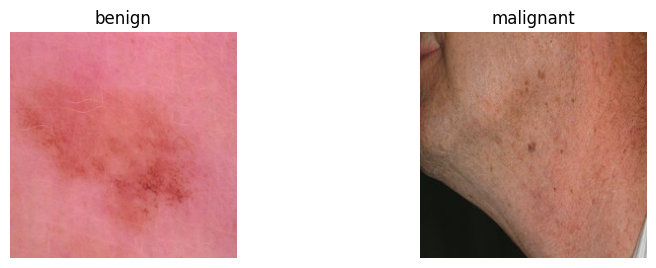

In [ ]:
plt.figure(figsize=(15, 10))

for i, class_ in enumerate(list(class_names)):
    plt.subplot(3, 3, i+1)
    data_path = os.path.join(str(tst_img_path), class_)
    file_path = glob.glob(os.path.join(data_path,'*.jpg'))[10]
    img = PIL.Image.open(file_path)
    plt.imshow(img)
    plt.title(class_)
    plt.axis("off")
plt.show()

In [ ]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)


In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

trn_img_path = '/content/drive/MyDrive/Colab Notebooks/archive/train'

# List of subdirectories to process
subdirectories = ['benign', 'malignant']

grayscale_images = []  # List to store grayscale images

# Loop through each subdirectory
for subdir in subdirectories:
    subdir_path = os.path.join(trn_img_path, subdir)

    # List all image files in the subdirectory
    image_files = os.listdir(subdir_path)

    # Calculate the number of images to process
    num_images_to_process = len(image_files) // 7

    # Process images in the subdirectory
    for i in range(num_images_to_process):
        image_file = image_files[i]
        img_path = os.path.join(subdir_path, image_file)

        # Print the image path for debugging
        print(f"Processing image: {img_path}")

        # Read and resize the image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Error reading image: {img_path}")
            continue

        f_s = (200, 200)
        img = cv2.resize(img, f_s)

        # Display the resized image
        cv2_imshow(img)

        # Convert to grayscale
        img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        grayscale_images.append(img_gr)
        cv2_imshow(img_gr)

In [ ]:
enhanced_images = []

# Loop through each grayscale image
for img_gr in grayscale_images:
    # using histogram equalization
    enhanced_img = cv2.equalizeHist(img_gr)
    enhanced_images.append(enhanced_img)

    # Display the enhanced grayscale image
    plt.figure(figsize=(2, 2))
    plt.imshow(enhanced_img, cmap='gray')
    plt.title("Enhanced Grayscale Image")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

In [ ]:
sharpened_images = []  # List to store sharpened enhanced images

# Define the sharpening kernel
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Loop through each enhanced grayscale image
for enhanced_img in enhanced_images:
    # Apply the sharpening kernel to the image
    sharpened_img = cv2.filter2D(enhanced_img, -1, sharpening_kernel)
    sharpened_images.append(sharpened_img)

    # Display the sharpened grayscale image
    plt.figure(figsize=(2, 2))
    plt.imshow(sharpened_img, cmap='gray')
    plt.title("Sharpened Image")
    plt.axis("off")

    plt.show()  # Display the sharpened image

In [ ]:
gaussian_filtered_images = []

# Loop through each enhanced grayscale image
for sharpened_img in sharpened_images:
    # Apply Gaussian filter to the enhanced grayscale image
    gaussian_filtered_img = cv2.GaussianBlur(sharpened_img, (5, 5), 0)
    gaussian_filtered_images.append(gaussian_filtered_img)

    # Display the Gaussian filtered image
    plt.figure(figsize=(2, 2))
    plt.imshow(gaussian_filtered_img, cmap='gray')
    plt.title("Gaussian Filtered Image")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

In [ ]:
edge_detected_images = []  # List to store edge-detected sharpened images

# Loop through each sharpened image
for gaussian_filtered_img in gaussian_filtered_images:
    # Apply Canny edge detection to the image
    edges = cv2.Canny(gaussian_filtered_img, threshold1=30, threshold2=70)
    edge_detected_images.append(edges)

    # Display the edge-detected image
    plt.figure(figsize=(2, 2))
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Detected Image")
    plt.axis("off")

    plt.show()

In [ ]:
from skimage.feature import hog
from skimage import exposure
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import cv2
import os
import numpy as np

# HOG parameters
hog_orientations = 8
hog_pixels_per_cell = (16, 16)
hog_cells_per_block = (1, 1)

def hog_data_extractor(edges):
    fd, _ = hog(edges, orientations=hog_orientations, pixels_per_cell=hog_pixels_per_cell,
                cells_per_block=hog_cells_per_block, visualize=True, multichannel=False)
    return fd

# Load your labels and HOG features here
X_train = []
X_test = []
label_train = []
label_test = []

# Path to your image root directory
img_root_path = '/content/drive/MyDrive/Colab Notebooks/archive/train'

# Call jpeg_to_array function for each scene type and data type
def jpeg_to_array(scene_type, data_type):
    scene_path = os.path.join(img_root_path, scene_type.lower())
    print('Loading ' + data_type + ' images for scene type ' + scene_type)
    for img in os.listdir(scene_path):
        img_path = os.path.join(scene_path, img)
        if img_path.endswith('.jpg'):
            jpeg_data = cv2.imread(img_path)
            jpeg_data = cv2.resize(jpeg_data, (150, 150))
            hog_features = hog_data_extractor(edges)  # Pass edge-detected image
            if data_type == 'Training':
                X_train.append(hog_features)
                label_train.append(str(scene_type))
            if data_type == 'Testing':
                X_test.append(hog_features)
                label_test.append(np.array(str(scene_type)))

# Call jpeg_to_array for each scene type and data type
scene_types = ['Benign', 'Malignant']
for scene_type in scene_types:
    jpeg_to_array(scene_type, 'Training')
    jpeg_to_array(scene_type, 'Testing')

# Convert labels to numeric values using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(label_train)
y_test_encoded = label_encoder.transform(label_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=0,tol=1e-5)
lsvc.fit(X_train,y_train_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

In [ ]:
y_svm = lsvc.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test_encoded,y_svm))

Accuracy on unknown data is 0.658703071672355


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train,y_train_encoded)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_knn = neigh.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test_encoded,y_knn))

Accuracy on unknown data is 0.6336746302616609


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20, random_state=40)
clf.fit(X_train,y_train_encoded)

RandomForestClassifier(max_depth=20, random_state=40)

In [ ]:
y_RF = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test_encoded,y_RF))

Accuracy on unknown data is 0.9594235874099355


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report(y_true = y_test_encoded, y_pred = y_RF, target_names= ['benign', 'malignant']))

              precision    recall  f1-score   support

      benign       1.00      0.93      0.96      1440
   malignant       0.92      1.00      0.96      1197

    accuracy                           0.96      2637
   macro avg       0.96      0.96      0.96      2637
weighted avg       0.96      0.96      0.96      2637



In [ ]:
def scene_predict(img_path):
    image = cv2.imread(img_path)
    ip_image = Image.open(img_path)
    image = cv2.resize(image, (150, 150))

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    prd_image_data = hog_data_extractor(gray_image)  # Extract HOG features from the grayscale image
    scene_predicted = clf.predict(prd_image_data.reshape(1, -1))[0]

    scene_labels = label_encoder.classes_  #class labels
    predicted_label = scene_labels[scene_predicted]  #predicted label

    fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow(ip_image)
    ax[0].set_title('Input image')

    ax[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Predicted scene: ' + predicted_label)

    plt.tight_layout()
    plt.show()

<ipython-input-135-ac0f6d431f0b>:16: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, _ = hog(image, orientations=hog_orientations, pixels_per_cell=hog_pixels_per_cell,


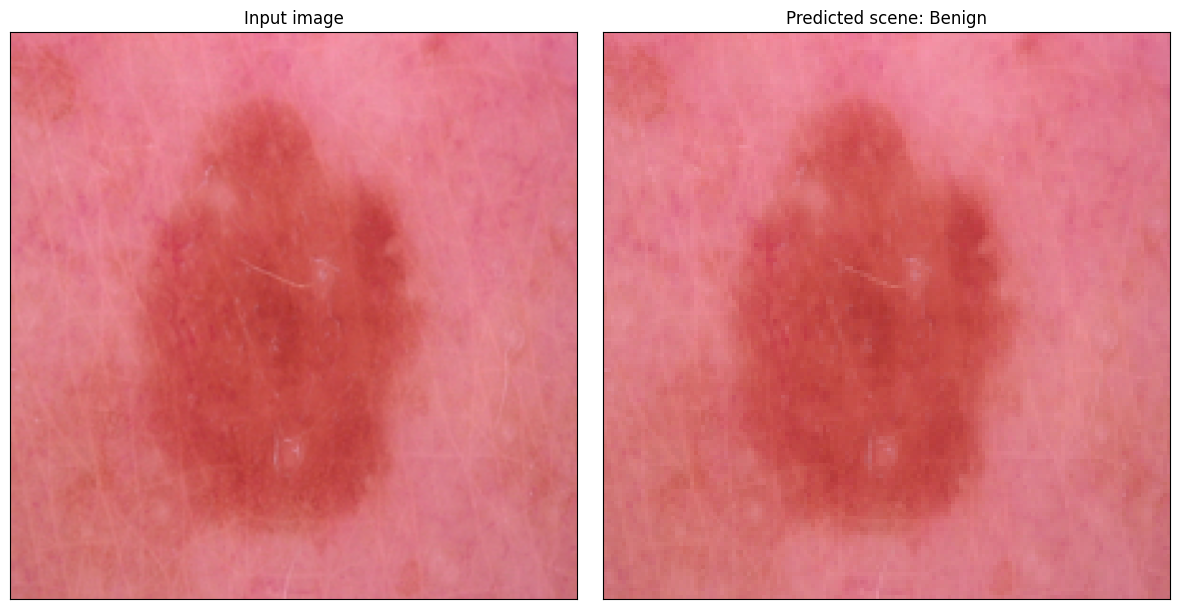

<ipython-input-135-ac0f6d431f0b>:16: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, _ = hog(image, orientations=hog_orientations, pixels_per_cell=hog_pixels_per_cell,


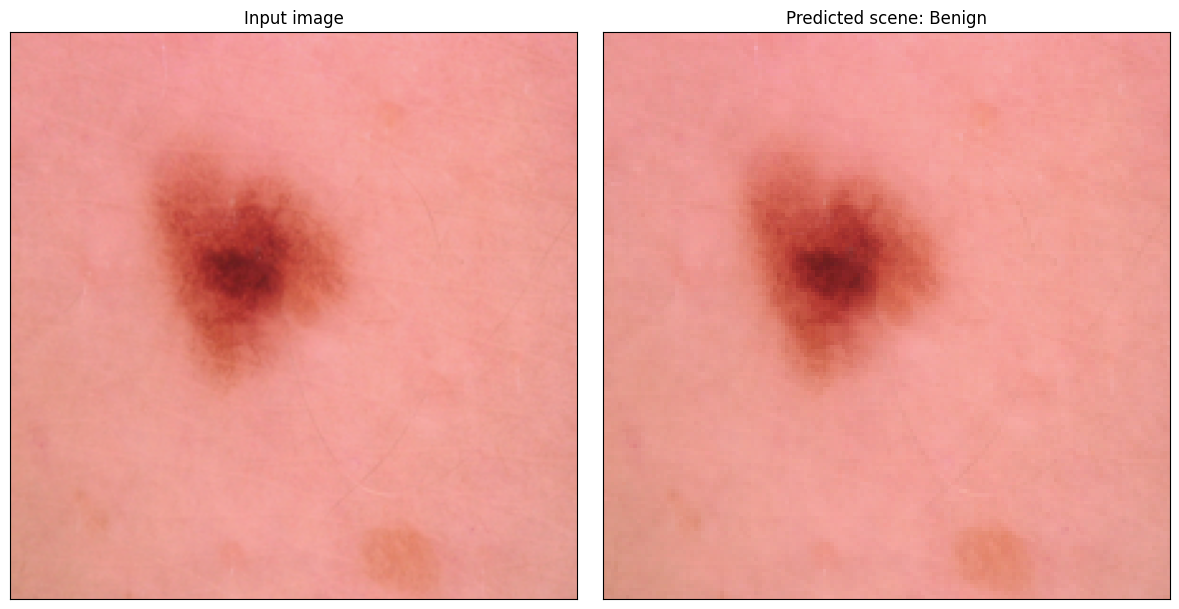

In [ ]:
ip_img_folder = "/content/drive/MyDrive/Colab Notebooks/archive/test/benign"
ip_img_files = ['/content/drive/MyDrive/Colab Notebooks/archive/test/benign/1042.jpg', '/content/drive/MyDrive/Colab Notebooks/archive/test/benign/1146.jpg']
scene_predicted = [scene_predict(os.path.join(ip_img_folder,img_file))for img_file in ip_img_files]